In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
mpl.rcParams['font.sans-serif'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

diabetes = datasets.load_diabetes()  
# 使用 scikit-learn 自带的一个糖尿病病人的数据集
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target,
                                                    test_size=0.25, 
                                                    random_state=0)
print(type(X_train))
print(X_train.shape, '\n', X_train[0])
print(y_train[:5])

<class 'numpy.ndarray'>
(331, 10) 
 [-0.04910502 -0.04464164 -0.05686312 -0.04354219 -0.04559945 -0.04327577
  0.00077881 -0.03949338 -0.01190068  0.01549073]
[ 68. 109.  94. 118. 275.]


基础回归器: [DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False,
           random_state=1593730384, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False,
           random_state=2018947022, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False,
           random_state=228214961, splitter='best')]
第一个样本的预测随分类器个数增加的变化: [array([100.23571429]), array([100.23571429]), array([100.23571429]), array([100.23571429]), array(

E:\software\anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


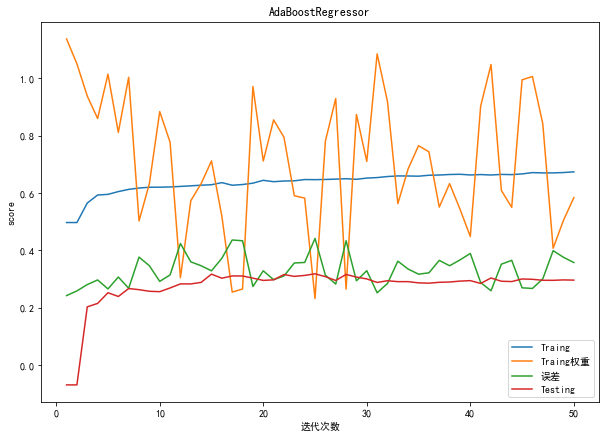

In [53]:
def test_AdaBoostRegressor(*data):
    X_train, X_test, y_train, y_test = data
    regr = ensemble.AdaBoostRegressor()
    regr.fit(X_train, y_train)
    print("基础回归器:", regr.estimators_[:3])
    print("第一个样本的预测随基础回归器个数增加的变化:", \
          list(regr.staged_predict(X_train[0])))
    print("第一个样本的实际值:", y_train[0])
    ## 绘图
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(1, 1, 1)
    estimators_num = len(regr.estimators_)
    X = range(1, estimators_num + 1)
    ax.plot(list(X), list(regr.staged_score(X_train, y_train)), label="Traing")
    ax.plot(list(X), list(regr.estimator_weights_), label="Traing权重")
    ax.plot(list(X), list(regr.estimator_errors_), label="误差")
    ax.plot(list(X), list(regr.staged_score(X_test, y_test)), label="Testing")
    ax.set_xlabel("迭代次数")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostRegressor")
#     ax.set_ylim(0, 1)
    plt.show()

test_AdaBoostRegressor(X_train, X_test, y_train, y_test)

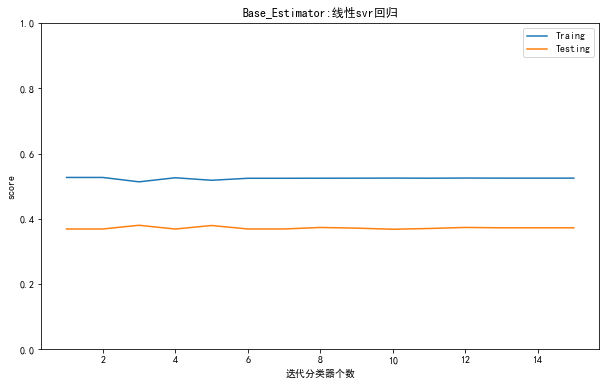

In [61]:
def test_AdaBoostRegressor_base_regr(*data):
    from sklearn.svm import LinearSVR
    X_train, X_test, y_train, y_test = data
    fig = plt.figure(figsize=(10, 6))
    regr = ensemble.AdaBoostRegressor(n_estimators=50, 
                                      base_estimator=LinearSVR(epsilon=0.01, 
                                                                 C=100)) 
    # 基础回归器为 LinearSVR
    label = "线性svr回归"
    ax = fig.add_subplot(1, 1, 1)
    regr.fit(X_train, y_train)
    
    ## 绘图
    estimators_num = len(regr.estimators_)
    X = range(1, estimators_num + 1)
    ax.plot(list(X), list(regr.staged_score(X_train, y_train)), label="Traing")
    ax.plot(list(X), list(regr.staged_score(X_test, y_test)), label="Testing")
    ax.set_xlabel("迭代分类器个数")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_ylim(0, 1)
    ax.set_title("Base_Estimator:%s" % label)
    plt.show()

test_AdaBoostRegressor_base_regr(X_train, X_test, y_train, y_test)

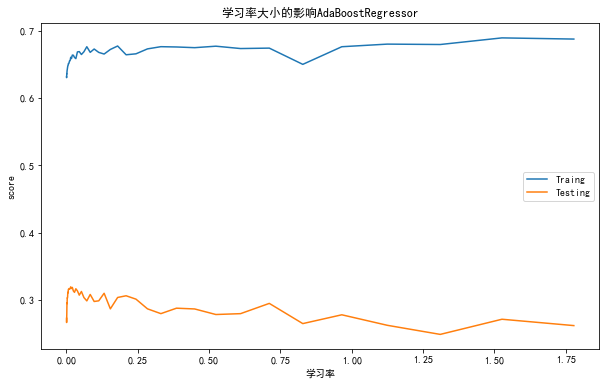

In [66]:
def test_AdaBoostRegressor_learning_rate(*data):
    X_train, X_test, y_train, y_test = data
    learning_rates = np.logspace(-3, 0.25)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)
    traing_scores = []
    testing_scores = []
    for learning_rate in learning_rates:
        regr = ensemble.AdaBoostRegressor(learning_rate=learning_rate, 
                                          n_estimators=1000)
        regr.fit(X_train, y_train)
        traing_scores.append(regr.score(X_train, y_train))
        testing_scores.append(regr.score(X_test, y_test))
    ax.plot(learning_rates, traing_scores, label="Traing")
    ax.plot(learning_rates, testing_scores, label="Testing")
    ax.set_xlabel("学习率")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("学习率大小的影响AdaBoostRegressor")
#     ax.set_xscale('log')
    plt.show()
    
test_AdaBoostRegressor_learning_rate(X_train, X_test, y_train, y_test)

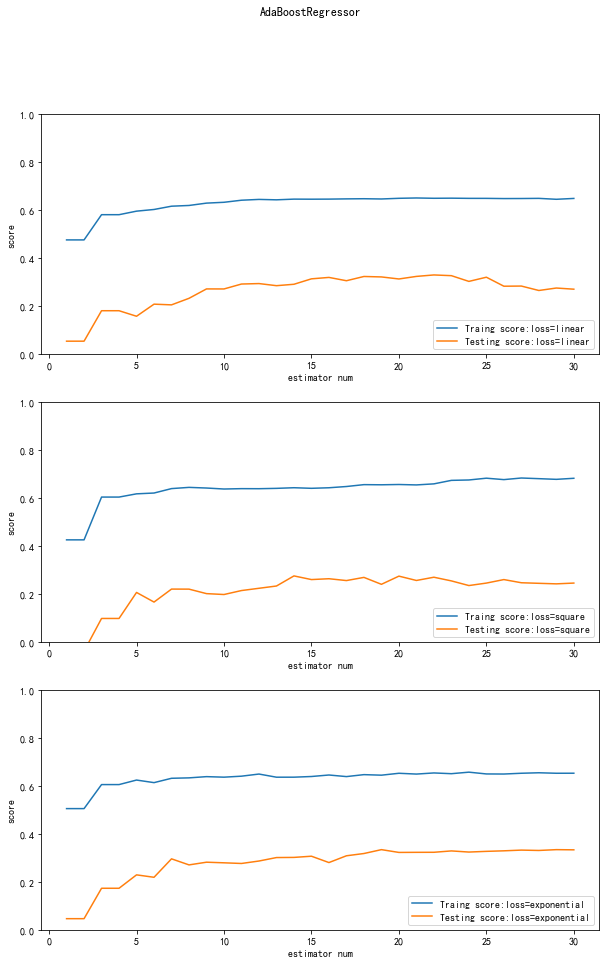

In [65]:
def test_AdaBoostRegressor_loss(*data):
    X_train, X_test, y_train, y_test = data
    losses = ['linear', 'square', 'exponential']
    fig = plt.figure(figsize=(10, 15))
    
    for i, loss in enumerate(losses):
        ax = fig.add_subplot(3, 1, i + 1)
        regr = ensemble.AdaBoostRegressor(loss=loss, n_estimators=30)
        regr.fit(X_train, y_train)
        ## 绘图
        estimators_num = len(regr.estimators_)
        X = range(1, estimators_num + 1)
        ax.plot(list(X), list(regr.staged_score(X_train, y_train)),
                label="Traing score:loss=%s" % loss)
        ax.plot(list(X), list(regr.staged_score(X_test, y_test)),
                label="Testing score:loss=%s" % loss)
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_ylim(0, 1)
    plt.suptitle("AdaBoostRegressor")
    plt.show()

test_AdaBoostRegressor_loss(X_train,X_test,y_train,y_test)